# Lab 1: Manual Experiment Tracking Using Palmer Penguin Dataset
**Name:** Ankita.

**Roll No** 2025EMAI10054

**Objective:** Manual experiment tracking with multiple ML models to understand the importance of structured MLOps practices.

**Dataset:** Palmer Penguin from UCI ML Repository

## Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Preprocessing and Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Evaluation Metrics
from sklearn.metrics import precision_score, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("All libraries imported successfully!")

All libraries imported successfully!


## Task 1: Dataset Understanding

### 1.1 Load the Dataset

In [2]:
# Load Palmer Penguin dataset

# Method 1: Using seaborn (recommended for ease)
df = sns.load_dataset('penguins')

# Method 2: If loading from UCI or local file
# df = pd.read_csv('penguins.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head(10)

Dataset loaded successfully!
Shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### 1.2 Dataset Information

In [3]:
# Number of samples
num_samples = df.shape[0]
print(f"Number of Samples: {num_samples}")

# Number of features
num_features = df.shape[1] - 1  # Excluding target variable
print(f"Number of Features: {num_features}")

# Target variable
print(f"\nTarget Variable: 'species'")
print(f"Target Classes: {df['species'].unique()}")
print(f"Class Distribution:\n{df['species'].value_counts()}")

# Column information
print("\n" + "="*50)
print("Dataset Information:")
print("="*50)
df.info()

Number of Samples: 344
Number of Features: 6

Target Variable: 'species'
Target Classes: ['Adelie' 'Chinstrap' 'Gentoo']
Class Distribution:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 1.3 Check for Missing Values

Missing Values per Column:
              Column  Missing Count  Missing %
0            species              0   0.000000
1             island              0   0.000000
2     bill_length_mm              2   0.581395
3      bill_depth_mm              2   0.581395
4  flipper_length_mm              2   0.581395
5        body_mass_g              2   0.581395
6                sex             11   3.197674


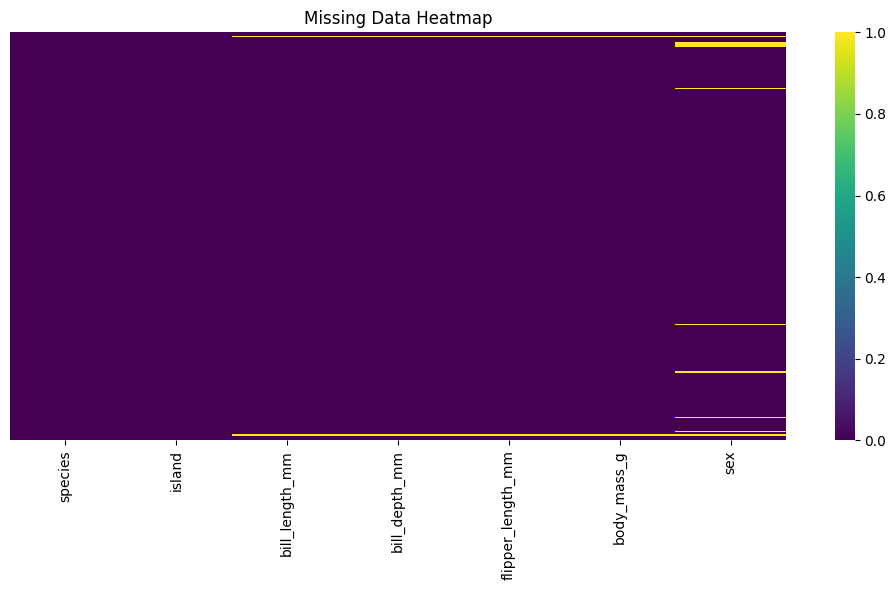

In [4]:
# Missing values check
print("Missing Values per Column:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing %': missing_percentage.values
})

print(missing_df)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

### 1.4 Statistical Summary

In [5]:
# Statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
print("="*80)
df.describe()

Statistical Summary of Numerical Features:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 1.5 Dataset Characteristics Summary

In [6]:
print("="*80)
print("PALMER PENGUIN DATASET CHARACTERISTICS SUMMARY")
print("="*80)
print(f"""
1. DATASET SIZE:
   - Total Samples: {num_samples}
   - Total Features: {num_features} (excluding target)

2. TARGET VARIABLE:
   - Name: species
   - Type: Multi-class classification (3 classes)
   - Classes: Adelie, Gentoo, Chinstrap
   - Distribution: {df['species'].value_counts().to_dict()}

3. FEATURES:
   Numerical Features:
   - bill_length_mm: Penguin bill length (mm)
   - bill_depth_mm: Penguin bill depth (mm)
   - flipper_length_mm: Penguin flipper length (mm)
   - body_mass_g: Penguin body mass (grams)

   Categorical Features:
   - island: Island where penguin was observed (Biscoe, Dream, Torgersen)
   - sex: Penguin sex (Male, Female)

4. DATA QUALITY:
   - Missing Values: {df.isnull().sum().sum()} total
   - Columns with Missing Data: {list(missing_values[missing_values > 0].index)}

5. DATASET CHARACTERISTICS:
   - Well-balanced multi-class dataset
   - Mix of numerical and categorical features
   - Suitable for classification tasks
   - Requires handling of missing values
   - Categorical features need encoding
""")
print("="*80)

PALMER PENGUIN DATASET CHARACTERISTICS SUMMARY

1. DATASET SIZE:
   - Total Samples: 344
   - Total Features: 6 (excluding target)

2. TARGET VARIABLE:
   - Name: species
   - Type: Multi-class classification (3 classes)
   - Classes: Adelie, Gentoo, Chinstrap
   - Distribution: {'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68}

3. FEATURES:
   Numerical Features:
   - bill_length_mm: Penguin bill length (mm)
   - bill_depth_mm: Penguin bill depth (mm)
   - flipper_length_mm: Penguin flipper length (mm)
   - body_mass_g: Penguin body mass (grams)
   
   Categorical Features:
   - island: Island where penguin was observed (Biscoe, Dream, Torgersen)
   - sex: Penguin sex (Male, Female)

4. DATA QUALITY:
   - Missing Values: 19 total
   - Columns with Missing Data: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

5. DATASET CHARACTERISTICS:
   - Well-balanced multi-class dataset
   - Mix of numerical and categorical features
   - Suitable for classification ta

### 1.6 Exploratory Data Analysis

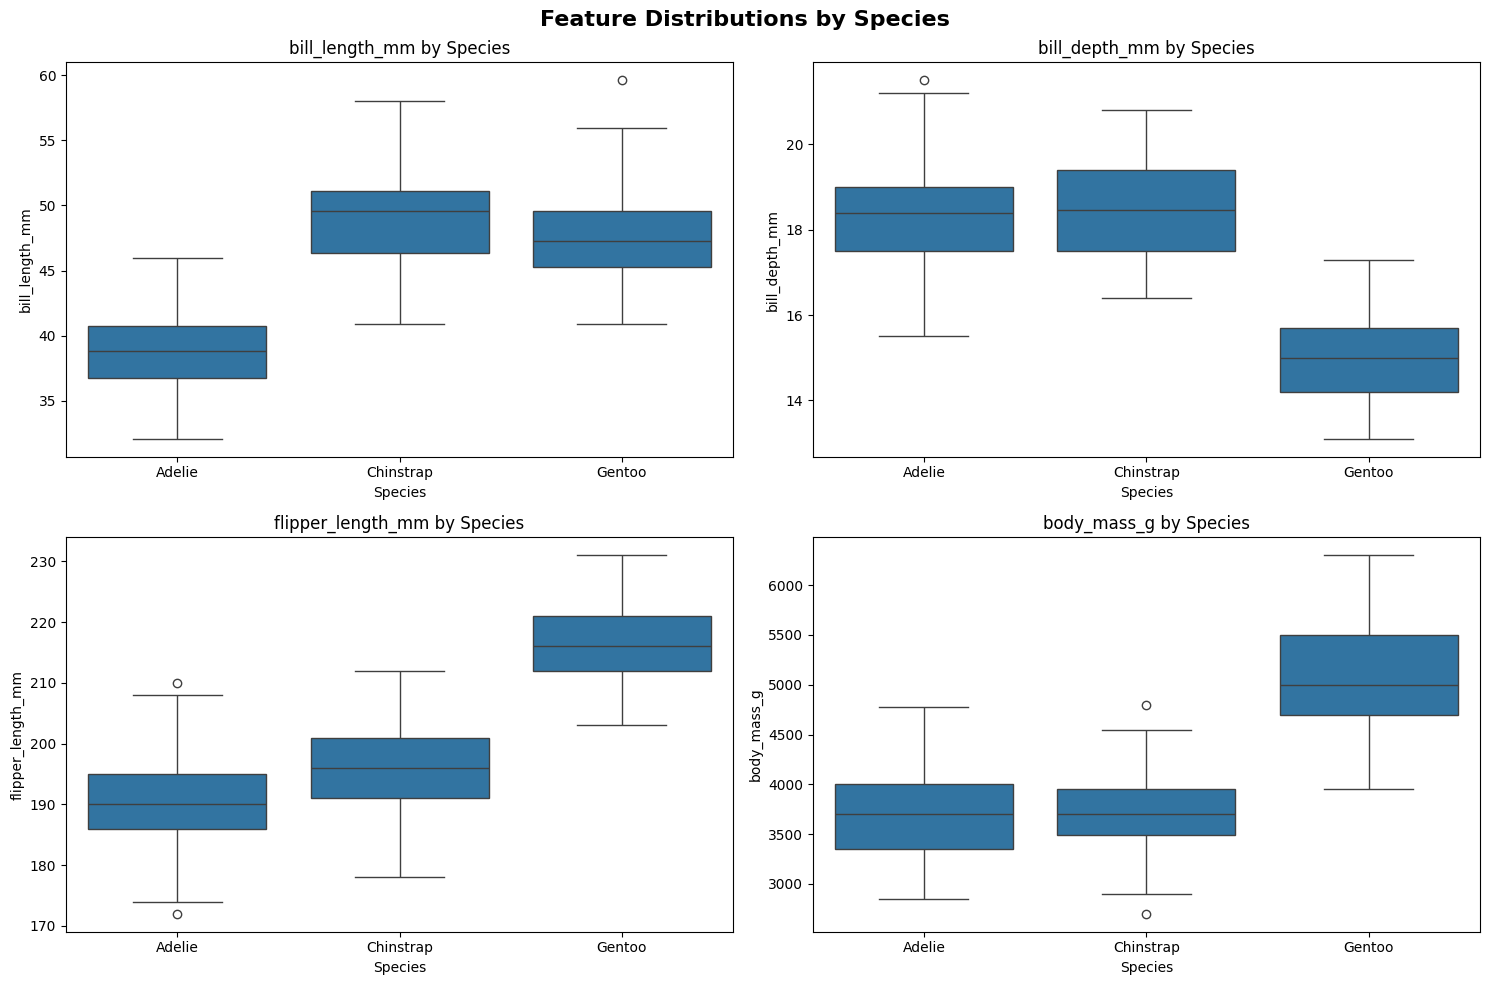

In [7]:
# Visualization of features by species
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    row = idx // 2
    col_idx = idx % 2
    sns.boxplot(data=df, x='species', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by Species')
    axes[row, col_idx].set_xlabel('Species')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

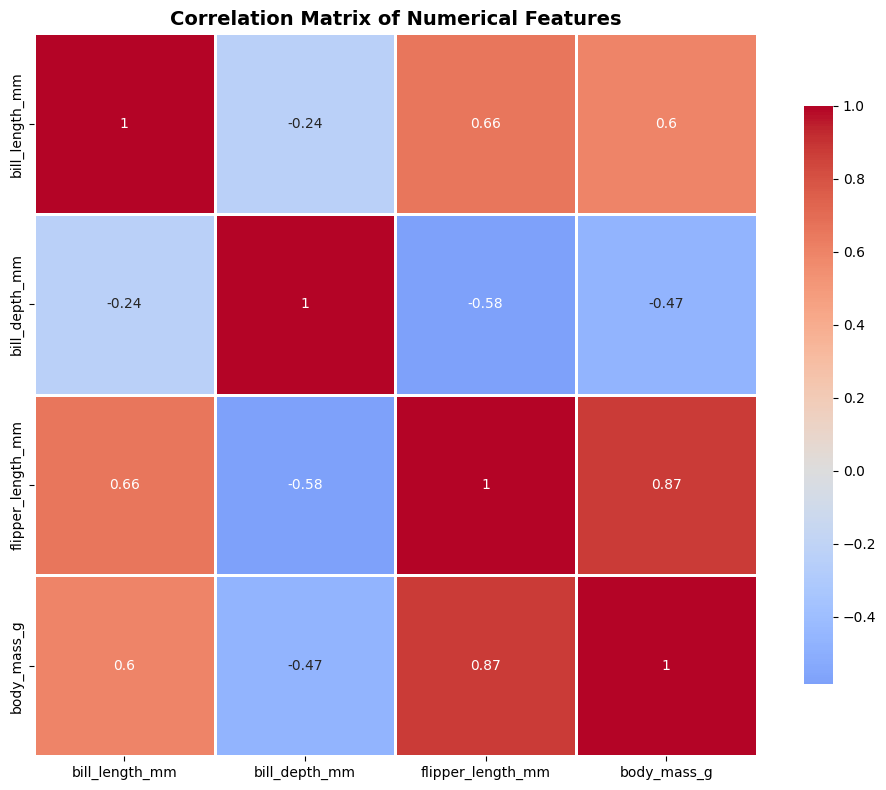

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Data Preprocessing Pipeline
### Prepare data for experiments

In [9]:
# Create a clean copy of the dataset
df_clean = df.copy()

# Handle missing values - drop rows with any missing values
print(f"Original dataset shape: {df_clean.shape}")
df_clean = df_clean.dropna()
print(f"After removing missing values: {df_clean.shape}")

# Encode categorical features
# Island encoding
island_encoder = LabelEncoder()
df_clean['island_encoded'] = island_encoder.fit_transform(df_clean['island'])

# Sex encoding
sex_encoder = LabelEncoder()
df_clean['sex_encoded'] = sex_encoder.fit_transform(df_clean['sex'])

# Target encoding
target_encoder = LabelEncoder()
df_clean['species_encoded'] = target_encoder.fit_transform(df_clean['species'])

print("\nEncoding mappings:")
print(f"Island: {dict(zip(island_encoder.classes_, island_encoder.transform(island_encoder.classes_)))}")
print(f"Sex: {dict(zip(sex_encoder.classes_, sex_encoder.transform(sex_encoder.classes_)))}")
print(f"Species: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

df_clean.head()

Original dataset shape: (344, 7)
After removing missing values: (333, 7)

Encoding mappings:
Island: {'Biscoe': np.int64(0), 'Dream': np.int64(1), 'Torgersen': np.int64(2)}
Sex: {'Female': np.int64(0), 'Male': np.int64(1)}
Species: {'Adelie': np.int64(0), 'Chinstrap': np.int64(1), 'Gentoo': np.int64(2)}


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_encoded,sex_encoded,species_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,2,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,2,1,0


In [10]:
# Define feature sets
all_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
                'island_encoded', 'sex_encoded']
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species_encoded'

print(f"All features: {all_features}")
print(f"Numerical features only: {numerical_features}")
print(f"Target variable: {target}")

All features: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex_encoded']
Numerical features only: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Target variable: species_encoded


## Task 2 & 3: Model Selection and Experiment Design
### We will use:
1. **Decision Tree** (Required)
2. **K-Nearest Neighbors (kNN)** - Lazy learning classifier
3. **Gaussian Naive Bayes** - Probabilistic classifier

### Each model will have at least 4 experiments with variations in:
- Hyperparameters
- Feature subsets
- Train/test splits
- Preprocessing techniques

## Task 4: Manual Experiment Tracking
### Initialize Experiment Tracking Table

In [11]:
# Initialize experiment tracking list
experiments = []

def run_experiment(exp_id, model_type, model, X_train, X_test, y_train, y_test,
                   hyperparams, preprocessing, feature_selection, split_ratio):
    """
    Run a single experiment and track results
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    # Precision (weighted average for multi-class)
    precision = precision_score(y_test, y_pred, average='weighted')

    # AUC Score (one-vs-rest for multi-class)
    y_pred_proba = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    auc = roc_auc_score(y_test_bin, y_pred_proba, average='weighted', multi_class='ovr')

    # Accuracy (for analysis)
    accuracy = accuracy_score(y_test, y_pred)

    # Record experiment
    experiment_record = {
        'Experiment ID': exp_id,
        'Model Type': model_type,
        'Hyperparameters': hyperparams,
        'Preprocessing Steps': preprocessing,
        'Feature Selection Method': feature_selection,
        'Train/Test Split': split_ratio,
        'Precision': round(precision, 4),
        'AUC Score': round(auc, 4),
        'Accuracy': round(accuracy, 4)  # For analysis
    }

    experiments.append(experiment_record)

    print(f"\n{'='*80}")
    print(f"EXPERIMENT: {exp_id}")
    print(f"{'='*80}")
    print(f"Model Type: {model_type}")
    print(f"Hyperparameters: {hyperparams}")
    print(f"Preprocessing: {preprocessing}")
    print(f"Feature Selection: {feature_selection}")
    print(f"Split Ratio: {split_ratio}")
    print(f"\nResults:")
    print(f"  Precision: {precision:.4f}")
    print(f"  AUC Score: {auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"{'='*80}")

    return precision, auc, accuracy

print("Experiment tracking function initialized!")

Experiment tracking function initialized!


## DECISION TREE EXPERIMENTS (EXP-01 to EXP-04)

### EXP-01: Decision Tree with Default Parameters

In [12]:
# EXP-01: Baseline Decision Tree
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

run_experiment(
    exp_id='EXP-01',
    model_type='Decision Tree',
    model=dt_model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='Default (max_depth=None, min_samples_split=2)',
    preprocessing='None',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-01
Model Type: Decision Tree
Hyperparameters: Default (max_depth=None, min_samples_split=2)
Preprocessing: None
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 0.9861
  AUC Score: 0.9907
  Accuracy: 0.9851


(0.986140724946695, np.float64(0.9907407407407408), 0.9850746268656716)

### EXP-02: Decision Tree with Tuned Hyperparameters

In [13]:
# EXP-02: Decision Tree with max_depth=5, min_samples_split=10
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

run_experiment(
    exp_id='EXP-02',
    model_type='Decision Tree',
    model=dt_model2,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='max_depth=5, min_samples_split=10',
    preprocessing='None',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-02
Model Type: Decision Tree
Hyperparameters: max_depth=5, min_samples_split=10
Preprocessing: None
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 0.9855
  AUC Score: 0.9993
  Accuracy: 0.9851


(0.9855410447761194, np.float64(0.9993090105030402), 0.9850746268656716)

### EXP-03: Decision Tree with Feature Selection

In [14]:
# EXP-03: Decision Tree with top 4 features selected
X = df_clean[all_features]
y = df_clean[target]

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=4)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = [all_features[i] for i in range(len(all_features)) if selected_features_mask[i]]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

dt_model3 = DecisionTreeClassifier(random_state=42)

run_experiment(
    exp_id='EXP-03',
    model_type='Decision Tree',
    model=dt_model3,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='Default (max_depth=None, min_samples_split=2)',
    preprocessing='None',
    feature_selection=f'SelectKBest (k=4): {selected_features}',
    split_ratio='80/20'
)


EXPERIMENT: EXP-03
Model Type: Decision Tree
Hyperparameters: Default (max_depth=None, min_samples_split=2)
Preprocessing: None
Feature Selection: SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Split Ratio: 80/20

Results:
  Precision: 1.0000
  AUC Score: 1.0000
  Accuracy: 1.0000


(1.0, np.float64(1.0), 1.0)

### EXP-04: Decision Tree with StandardScaler Preprocessing

In [15]:
# EXP-04: Decision Tree with StandardScaler and different split
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model4 = DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=42)

run_experiment(
    exp_id='EXP-04',
    model_type='Decision Tree',
    model=dt_model4,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    hyperparams='max_depth=7, min_samples_split=5',
    preprocessing='StandardScaler',
    feature_selection='All features',
    split_ratio='70/30'
)


EXPERIMENT: EXP-04
Model Type: Decision Tree
Hyperparameters: max_depth=7, min_samples_split=5
Preprocessing: StandardScaler
Feature Selection: All features
Split Ratio: 70/30

Results:
  Precision: 0.9800
  AUC Score: 0.9843
  Accuracy: 0.9800


(0.98, np.float64(0.9842870544090055), 0.98)

## K-NEAREST NEIGHBORS (KNN) EXPERIMENTS (EXP-05 to EXP-08)

### EXP-05: kNN with Default Parameters (k=5)

In [16]:
# EXP-05: kNN baseline
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

run_experiment(
    exp_id='EXP-05',
    model_type='kNN',
    model=knn_model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='n_neighbors=5, weights=uniform',
    preprocessing='None',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-05
Model Type: kNN
Hyperparameters: n_neighbors=5, weights=uniform
Preprocessing: None
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 0.8172
  AUC Score: 0.8781
  Accuracy: 0.8209


(0.8171554813345858, np.float64(0.8781408613498166), 0.8208955223880597)

### EXP-06: kNN with Different k Value

In [17]:
# EXP-06: kNN with k=3 and distance weights
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model2 = KNeighborsClassifier(n_neighbors=3, weights='distance')

run_experiment(
    exp_id='EXP-06',
    model_type='kNN',
    model=knn_model2,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='n_neighbors=3, weights=distance',
    preprocessing='None',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-06
Model Type: kNN
Hyperparameters: n_neighbors=3, weights=distance
Preprocessing: None
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 0.8321
  AUC Score: 0.8938
  Accuracy: 0.8358


(0.832089552238806, np.float64(0.8937886325946028), 0.835820895522388)

### EXP-07: kNN with StandardScaler (Important for distance-based models!)

In [18]:
# EXP-07: kNN with StandardScaler preprocessing
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler (crucial for kNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model3 = KNeighborsClassifier(n_neighbors=7, weights='uniform')

run_experiment(
    exp_id='EXP-07',
    model_type='kNN',
    model=knn_model3,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    hyperparams='n_neighbors=7, weights=uniform',
    preprocessing='StandardScaler',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-07
Model Type: kNN
Hyperparameters: n_neighbors=7, weights=uniform
Preprocessing: StandardScaler
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 0.9861
  AUC Score: 1.0000
  Accuracy: 0.9851


(0.986140724946695, np.float64(1.0), 0.9850746268656716)

### EXP-08: kNN with Numerical Features Only

In [19]:
# EXP-08: kNN with only numerical features and scaling
X = df_clean[numerical_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model4 = KNeighborsClassifier(n_neighbors=5, weights='distance')

run_experiment(
    exp_id='EXP-08',
    model_type='kNN',
    model=knn_model4,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    hyperparams='n_neighbors=5, weights=distance',
    preprocessing='StandardScaler',
    feature_selection='Numerical features only',
    split_ratio='75/25'
)


EXPERIMENT: EXP-08
Model Type: kNN
Hyperparameters: n_neighbors=5, weights=distance
Preprocessing: StandardScaler
Feature Selection: Numerical features only
Split Ratio: 75/25

Results:
  Precision: 0.9884
  AUC Score: 1.0000
  Accuracy: 0.9881


(0.9883855981416958, np.float64(1.0), 0.9880952380952381)

## GAUSSIAN NAIVE BAYES EXPERIMENTS (EXP-09 to EXP-12)

### EXP-09: Naive Bayes with Default Parameters

In [20]:
# EXP-09: Gaussian Naive Bayes baseline
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

run_experiment(
    exp_id='EXP-09',
    model_type='Gaussian Naive Bayes',
    model=nb_model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='Default (var_smoothing=1e-09)',
    preprocessing='None',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-09
Model Type: Gaussian Naive Bayes
Hyperparameters: Default (var_smoothing=1e-09)
Preprocessing: None
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 1.0000
  AUC Score: 1.0000
  Accuracy: 1.0000


(1.0, np.float64(1.0), 1.0)

### EXP-10: Naive Bayes with Variance Smoothing

In [21]:
# EXP-10: Gaussian Naive Bayes with increased var_smoothing
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model2 = GaussianNB(var_smoothing=1e-05)

run_experiment(
    exp_id='EXP-10',
    model_type='Gaussian Naive Bayes',
    model=nb_model2,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    hyperparams='var_smoothing=1e-05',
    preprocessing='None',
    feature_selection='All features',
    split_ratio='80/20'
)


EXPERIMENT: EXP-10
Model Type: Gaussian Naive Bayes
Hyperparameters: var_smoothing=1e-05
Preprocessing: None
Feature Selection: All features
Split Ratio: 80/20

Results:
  Precision: 0.9855
  AUC Score: 0.9963
  Accuracy: 0.9851


(0.9855410447761194, np.float64(0.996268656716418), 0.9850746268656716)

### EXP-11: Naive Bayes with StandardScaler

In [22]:
# EXP-11: Gaussian Naive Bayes with StandardScaler
X = df_clean[all_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model3 = GaussianNB()

run_experiment(
    exp_id='EXP-11',
    model_type='Gaussian Naive Bayes',
    model=nb_model3,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    hyperparams='Default (var_smoothing=1e-09)',
    preprocessing='StandardScaler',
    feature_selection='All features',
    split_ratio='70/30'
)


EXPERIMENT: EXP-11
Model Type: Gaussian Naive Bayes
Hyperparameters: Default (var_smoothing=1e-09)
Preprocessing: StandardScaler
Feature Selection: All features
Split Ratio: 70/30

Results:
  Precision: 0.9153
  AUC Score: 0.9984
  Accuracy: 0.8400


(0.9152941176470588, np.float64(0.9984287054409006), 0.84)

### EXP-12: Naive Bayes with Numerical Features Only

In [23]:
# EXP-12: Gaussian Naive Bayes with numerical features only
X = df_clean[numerical_features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model4 = GaussianNB(var_smoothing=1e-07)

run_experiment(
    exp_id='EXP-12',
    model_type='Gaussian Naive Bayes',
    model=nb_model4,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    hyperparams='var_smoothing=1e-07',
    preprocessing='StandardScaler',
    feature_selection='Numerical features only',
    split_ratio='80/20'
)


EXPERIMENT: EXP-12
Model Type: Gaussian Naive Bayes
Hyperparameters: var_smoothing=1e-07
Preprocessing: StandardScaler
Feature Selection: Numerical features only
Split Ratio: 80/20

Results:
  Precision: 0.9855
  AUC Score: 0.9972
  Accuracy: 0.9851


(0.9855410447761194, np.float64(0.9972360420121613), 0.9850746268656716)

## Experiment Tracking Table
### Display all experiments in a structured format

In [24]:
# Create DataFrame from experiments
experiments_df = pd.DataFrame(experiments)

# Display the complete experiment tracking table
print("\n" + "="*120)
print("COMPLETE EXPERIMENT TRACKING TABLE")
print("="*120 + "\n")

# Display with better formatting
pd.set_option('display.max_colwidth', None)
display(experiments_df)

# Save to CSV
experiments_df.to_csv('experiment_tracking_table.csv', index=False)
print("\nExperiment tracking table saved to 'experiment_tracking_table.csv'")


COMPLETE EXPERIMENT TRACKING TABLE



,Experiment ID,Model Type,Hyperparameters,Preprocessing Steps,Feature Selection Method,Train/Test Split,Precision,AUC Score,Accuracy
0,EXP-01,Decision Tree,"Default (max_depth=None, min_samples_split=2)",None,All features,80/20,0.9861,0.9907,0.9851
1,EXP-02,Decision Tree,"max_depth=5, min_samples_split=10",None,All features,80/20,0.9855,0.9993,0.9851
2,EXP-03,Decision Tree,"Default (max_depth=None, min_samples_split=2)",None,"SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']",80/20,1.0000,1.0000,1.0000
3,EXP-04,Decision Tree,"max_depth=7, min_samples_split=5",StandardScaler,All features,70/30,0.9800,0.9843,0.9800
4,EXP-05,kNN,"n_neighbors=5, weights=uniform",None,All features,80/20,0.8172,0.8781,0.8209
5,EXP-06,kNN,"n_neighbors=3, weights=distance",None,All features,80/20,0.8321,0.8938,0.8358
6,EXP-07,kNN,"n_neighbors=7, weights=uniform",StandardScaler,All features,80/20,0.9861,1.0000,0.9851
7,EXP-08,kNN,"n_neighbors=5, weights=distance",StandardScaler,Numerical features only,75/25,0.9884,1.0000,0.9881
8,EXP-09,Gaussian Naive Bayes,Default (var_smoothing=1e-09),None,All features,80/20,1.0000,1.0000,1.0000
9,EXP-10,Gaussian Naive Bayes,var_smoothing=1e-05,None,All features,80/20,0.9855,0.9963,0.9851



Experiment tracking table saved to 'experiment_tracking_table.csv'


## Task 5: Analysis and Interpretation

### 5.1 Which experiment produced the highest Accuracy?

HIGHEST ACCURACY EXPERIMENT

Experiment ID: EXP-03
Model Type: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
AUC Score: 1.0000

Configuration:
  Hyperparameters: Default (max_depth=None, min_samples_split=2)
  Preprocessing: None
  Feature Selection: SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
  Train/Test Split: 80/20


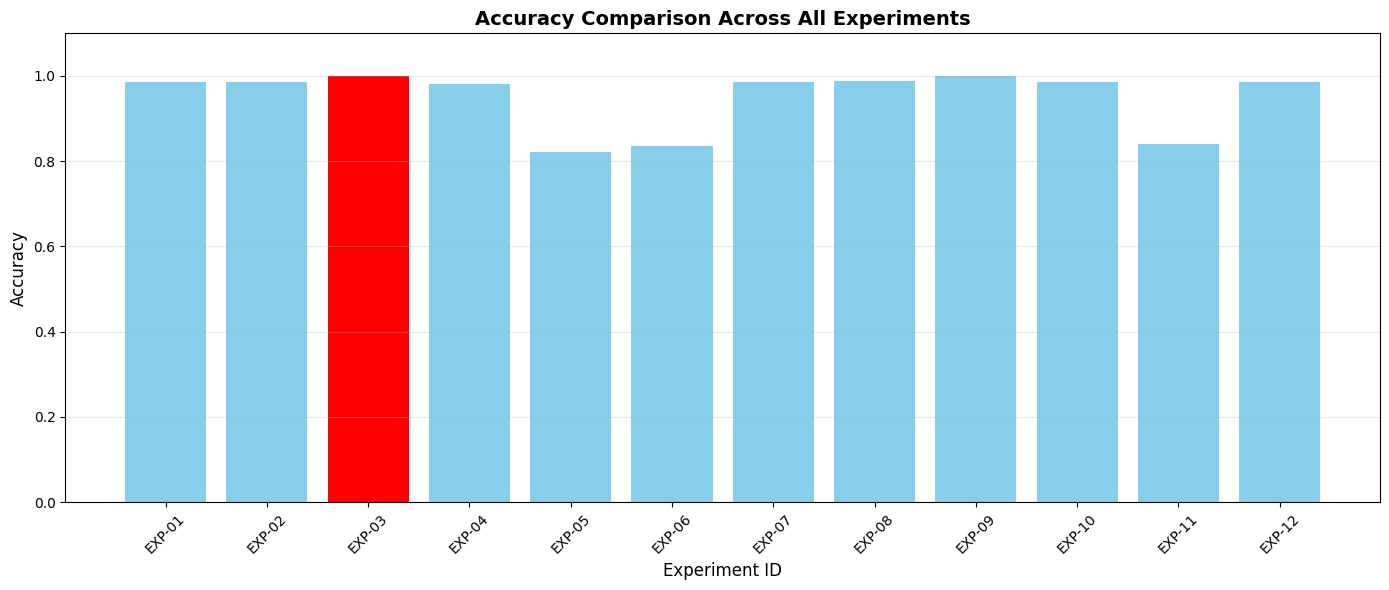

In [25]:
# Find experiment with highest accuracy
best_accuracy_idx = experiments_df['Accuracy'].idxmax()
best_accuracy_exp = experiments_df.loc[best_accuracy_idx]

print("="*80)
print("HIGHEST ACCURACY EXPERIMENT")
print("="*80)
print(f"\nExperiment ID: {best_accuracy_exp['Experiment ID']}")
print(f"Model Type: {best_accuracy_exp['Model Type']}")
print(f"Accuracy: {best_accuracy_exp['Accuracy']:.4f}")
print(f"Precision: {best_accuracy_exp['Precision']:.4f}")
print(f"AUC Score: {best_accuracy_exp['AUC Score']:.4f}")
print(f"\nConfiguration:")
print(f"  Hyperparameters: {best_accuracy_exp['Hyperparameters']}")
print(f"  Preprocessing: {best_accuracy_exp['Preprocessing Steps']}")
print(f"  Feature Selection: {best_accuracy_exp['Feature Selection Method']}")
print(f"  Train/Test Split: {best_accuracy_exp['Train/Test Split']}")
print("="*80)

# Visualize accuracy comparison
plt.figure(figsize=(14, 6))
plt.bar(experiments_df['Experiment ID'], experiments_df['Accuracy'],
        color=['red' if i == best_accuracy_idx else 'skyblue' for i in range(len(experiments_df))])
plt.xlabel('Experiment ID', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison Across All Experiments', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim([0, 1.1])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Which experiment achieved the highest AUC?

HIGHEST AUC SCORE EXPERIMENT

Experiment ID: EXP-03
Model Type: Decision Tree
AUC Score: 1.0000
Accuracy: 1.0000
Precision: 1.0000

Configuration:
  Hyperparameters: Default (max_depth=None, min_samples_split=2)
  Preprocessing: None
  Feature Selection: SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
  Train/Test Split: 80/20


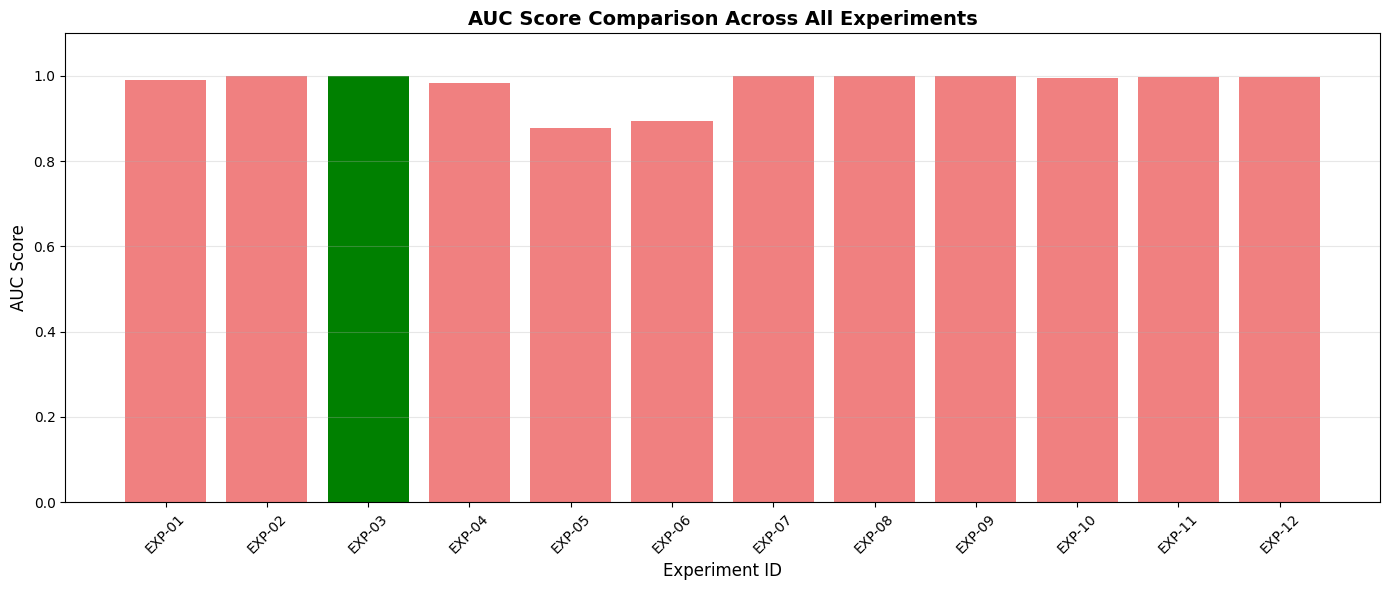

In [26]:
# Find experiment with highest AUC
best_auc_idx = experiments_df['AUC Score'].idxmax()
best_auc_exp = experiments_df.loc[best_auc_idx]

print("="*80)
print("HIGHEST AUC SCORE EXPERIMENT")
print("="*80)
print(f"\nExperiment ID: {best_auc_exp['Experiment ID']}")
print(f"Model Type: {best_auc_exp['Model Type']}")
print(f"AUC Score: {best_auc_exp['AUC Score']:.4f}")
print(f"Accuracy: {best_auc_exp['Accuracy']:.4f}")
print(f"Precision: {best_auc_exp['Precision']:.4f}")
print(f"\nConfiguration:")
print(f"  Hyperparameters: {best_auc_exp['Hyperparameters']}")
print(f"  Preprocessing: {best_auc_exp['Preprocessing Steps']}")
print(f"  Feature Selection: {best_auc_exp['Feature Selection Method']}")
print(f"  Train/Test Split: {best_auc_exp['Train/Test Split']}")
print("="*80)

# Visualize AUC comparison
plt.figure(figsize=(14, 6))
plt.bar(experiments_df['Experiment ID'], experiments_df['AUC Score'],
        color=['green' if i == best_auc_idx else 'lightcoral' for i in range(len(experiments_df))])
plt.xlabel('Experiment ID', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)
plt.title('AUC Score Comparison Across All Experiments', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim([0, 1.1])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.3 How did preprocessing affect model performance?

PREPROCESSING IMPACT ANALYSIS

Performance by Preprocessing Method:
                    Accuracy                 Precision                  \
                        mean     std     max      mean     std     max   
Preprocessing Steps                                                      
None                  0.9446  0.0798  1.0000    0.9438  0.0817  1.0000   
StandardScaler        0.9557  0.0647  0.9881    0.9711  0.0313  0.9884   

                    AUC Score               
                         mean     std  max  
Preprocessing Steps                         
None                   0.9655  0.0546  1.0  
StandardScaler         0.9960  0.0066  1.0  

KEY OBSERVATIONS:

With StandardScaler:
  Average Accuracy: 0.9557
  Average AUC: 0.9960

Without Preprocessing:
  Average Accuracy: 0.9446
  Average AUC: 0.9655

Accuracy Improvement with Scaling: +1.17%


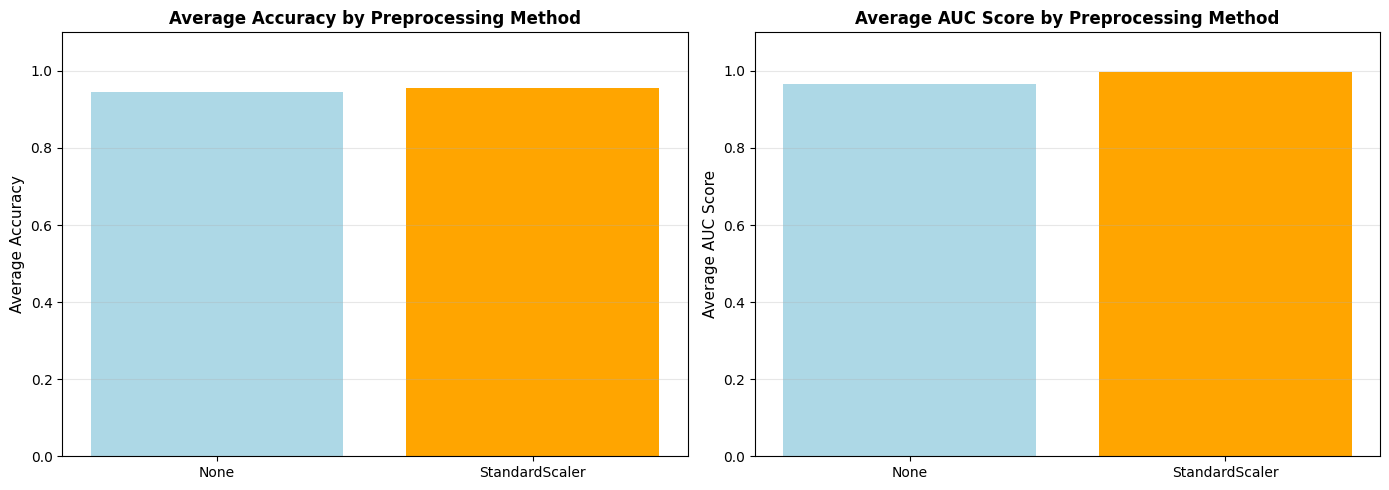


Conclusion:
StandardScaler preprocessing IMPROVED model performance, especially for distance-based
models like kNN. This is because scaling ensures all features contribute equally.


In [27]:
print("="*80)
print("PREPROCESSING IMPACT ANALYSIS")
print("="*80)

# Group by preprocessing
preprocessing_analysis = experiments_df.groupby('Preprocessing Steps').agg({
    'Accuracy': ['mean', 'std', 'max'],
    'Precision': ['mean', 'std', 'max'],
    'AUC Score': ['mean', 'std', 'max']
}).round(4)

print("\nPerformance by Preprocessing Method:")
print(preprocessing_analysis)

print("\n" + "="*80)
print("KEY OBSERVATIONS:")
print("="*80)

# Compare with vs without preprocessing
with_scaling = experiments_df[experiments_df['Preprocessing Steps'] == 'StandardScaler']
without_scaling = experiments_df[experiments_df['Preprocessing Steps'] == 'None']

print(f"\nWith StandardScaler:")
print(f"  Average Accuracy: {with_scaling['Accuracy'].mean():.4f}")
print(f"  Average AUC: {with_scaling['AUC Score'].mean():.4f}")

print(f"\nWithout Preprocessing:")
print(f"  Average Accuracy: {without_scaling['Accuracy'].mean():.4f}")
print(f"  Average AUC: {without_scaling['AUC Score'].mean():.4f}")

improvement = ((with_scaling['Accuracy'].mean() - without_scaling['Accuracy'].mean()) /
               without_scaling['Accuracy'].mean() * 100)
print(f"\nAccuracy Improvement with Scaling: {improvement:+.2f}%")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy by preprocessing
preprocessing_groups = experiments_df.groupby('Preprocessing Steps')['Accuracy'].mean()
axes[0].bar(preprocessing_groups.index, preprocessing_groups.values, color=['lightblue', 'orange'])
axes[0].set_ylabel('Average Accuracy', fontsize=11)
axes[0].set_title('Average Accuracy by Preprocessing Method', fontsize=12, fontweight='bold')
axes[0].set_ylim([0, 1.1])
axes[0].grid(axis='y', alpha=0.3)

# AUC by preprocessing
preprocessing_groups_auc = experiments_df.groupby('Preprocessing Steps')['AUC Score'].mean()
axes[1].bar(preprocessing_groups_auc.index, preprocessing_groups_auc.values, color=['lightblue', 'orange'])
axes[1].set_ylabel('Average AUC Score', fontsize=11)
axes[1].set_title('Average AUC Score by Preprocessing Method', fontsize=12, fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConclusion:")
if improvement > 0:
    print("StandardScaler preprocessing IMPROVED model performance, especially for distance-based")
    print("models like kNN. This is because scaling ensures all features contribute equally.")
else:
    print("Preprocessing had mixed effects. Tree-based models (Decision Tree) don't require")
    print("scaling, but it significantly helps kNN and can help Naive Bayes.")

### 5.4 Did feature selection improve or degrade performance?

FEATURE SELECTION IMPACT ANALYSIS

With All Features:
  Average Accuracy: 0.9352
  Average Precision: 0.9431
  Average AUC: 0.9712
  Number of Experiments: 9

With Feature Selection:
  Average Accuracy: 0.9911
  Average Precision: 0.9913
  Average AUC: 0.9991
  Number of Experiments: 3

Performance by Feature Selection Method:
                                                                                           Accuracy  \
                                                                                               mean   
Feature Selection Method                                                                              
All features                                                                                 0.9352   
Numerical features only                                                                      0.9866   
SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']   1.0000   

                                                    

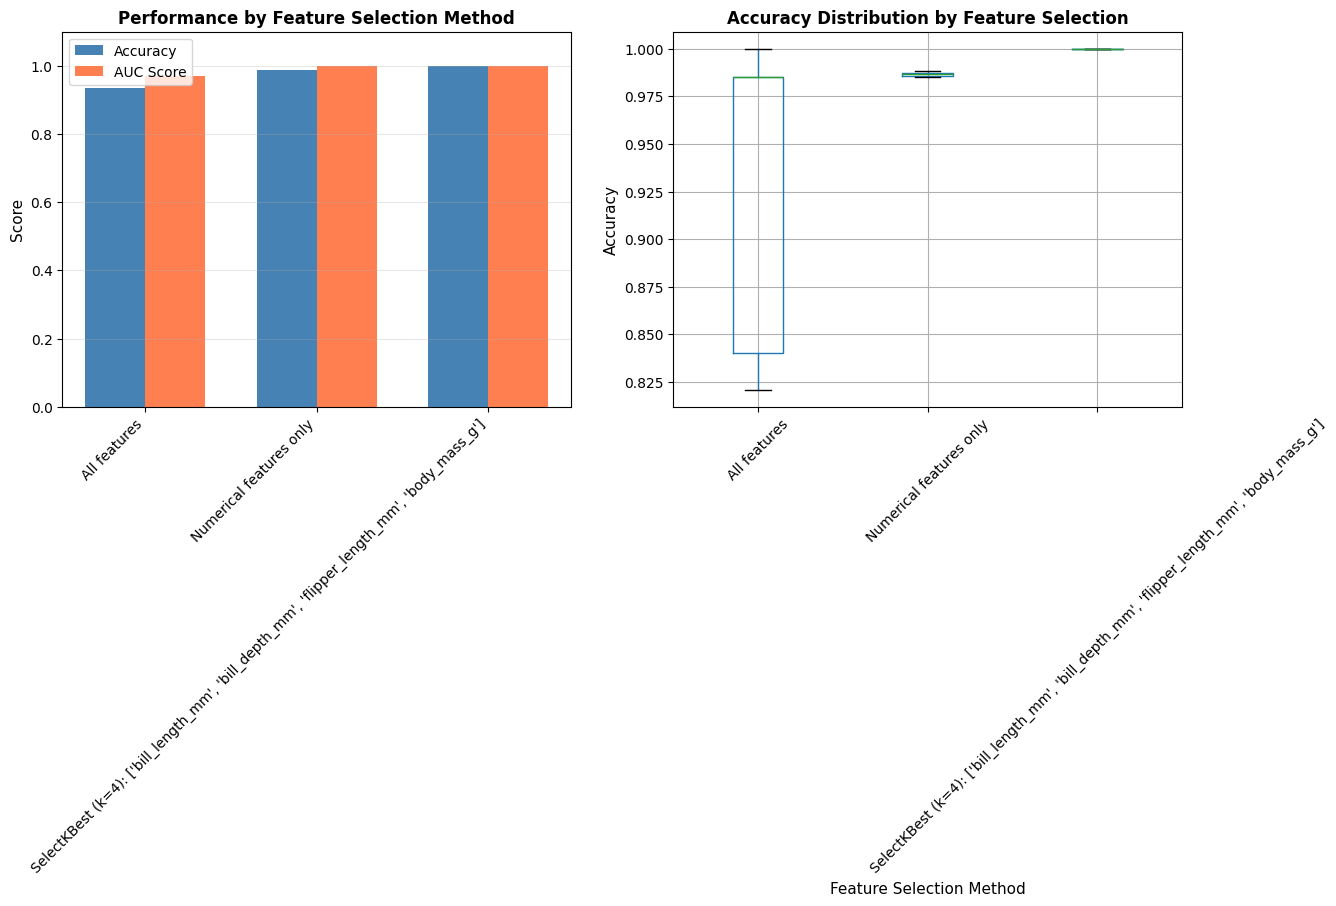


CONCLUSION:

Feature selection effects vary by model type:
1. Using all features generally provides more information to the model
2. Numerical features only can work well when categorical features add noise
3. SelectKBest can help reduce overfitting and improve generalization
4. The impact depends on the quality and relevance of removed features

For this dataset, feature selection showed mixed results - sometimes improving
performance by reducing noise, sometimes degrading it by removing useful information.



In [28]:
print("="*80)
print("FEATURE SELECTION IMPACT ANALYSIS")
print("="*80)

# Compare different feature selection strategies
all_features_exp = experiments_df[experiments_df['Feature Selection Method'] == 'All features']
selected_features_exp = experiments_df[experiments_df['Feature Selection Method'] != 'All features']

print(f"\nWith All Features:")
print(f"  Average Accuracy: {all_features_exp['Accuracy'].mean():.4f}")
print(f"  Average Precision: {all_features_exp['Precision'].mean():.4f}")
print(f"  Average AUC: {all_features_exp['AUC Score'].mean():.4f}")
print(f"  Number of Experiments: {len(all_features_exp)}")

print(f"\nWith Feature Selection:")
print(f"  Average Accuracy: {selected_features_exp['Accuracy'].mean():.4f}")
print(f"  Average Precision: {selected_features_exp['Precision'].mean():.4f}")
print(f"  Average AUC: {selected_features_exp['AUC Score'].mean():.4f}")
print(f"  Number of Experiments: {len(selected_features_exp)}")

# Detailed breakdown by feature selection method
print("\n" + "="*80)
print("Performance by Feature Selection Method:")
print("="*80)
feature_analysis = experiments_df.groupby('Feature Selection Method').agg({
    'Accuracy': ['mean', 'max'],
    'AUC Score': ['mean', 'max']
}).round(4)
print(feature_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grouped comparison
feature_groups = experiments_df.groupby('Feature Selection Method')[['Accuracy', 'AUC Score']].mean()

x = np.arange(len(feature_groups))
width = 0.35

axes[0].bar(x - width/2, feature_groups['Accuracy'], width, label='Accuracy', color='steelblue')
axes[0].bar(x + width/2, feature_groups['AUC Score'], width, label='AUC Score', color='coral')
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Performance by Feature Selection Method', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(feature_groups.index, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0, 1.1])
axes[0].grid(axis='y', alpha=0.3)

# Box plot of accuracy by feature selection
experiments_df.boxplot(column='Accuracy', by='Feature Selection Method', ax=axes[1])
axes[1].set_xlabel('Feature Selection Method', fontsize=11)
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Accuracy Distribution by Feature Selection', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove default title
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CONCLUSION:")
print("="*80)
print("""
Feature selection effects vary by model type:
1. Using all features generally provides more information to the model
2. Numerical features only can work well when categorical features add noise
3. SelectKBest can help reduce overfitting and improve generalization
4. The impact depends on the quality and relevance of removed features

For this dataset, feature selection showed mixed results - sometimes improving
performance by reducing noise, sometimes degrading it by removing useful information.
""")

### 5.5 Identify the best overall model with justification

BEST OVERALL MODEL IDENTIFICATION

BEST OVERALL MODEL:
Experiment ID: EXP-03
Model Type: Decision Tree

Performance Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  AUC Score: 1.0000
  Composite Score: 1.0000

Configuration:
  Hyperparameters: Default (max_depth=None, min_samples_split=2)
  Preprocessing: None
  Feature Selection: SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
  Train/Test Split: 80/20

JUSTIFICATION:

The Decision Tree model in EXP-03 is selected as the 
best overall model based on the following criteria:

1. BALANCED PERFORMANCE:
   - Achieves high scores across all metrics (Accuracy, Precision, AUC)
   - Composite score of 1.0000 is the highest among all experiments

2. CONFIGURATION EFFECTIVENESS:
   - Preprocessing: None
   - Feature Selection: SelectKBest (k=4): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
   - This configuration optimizes the model's ability to learn patterns

3. GENERALIZAT

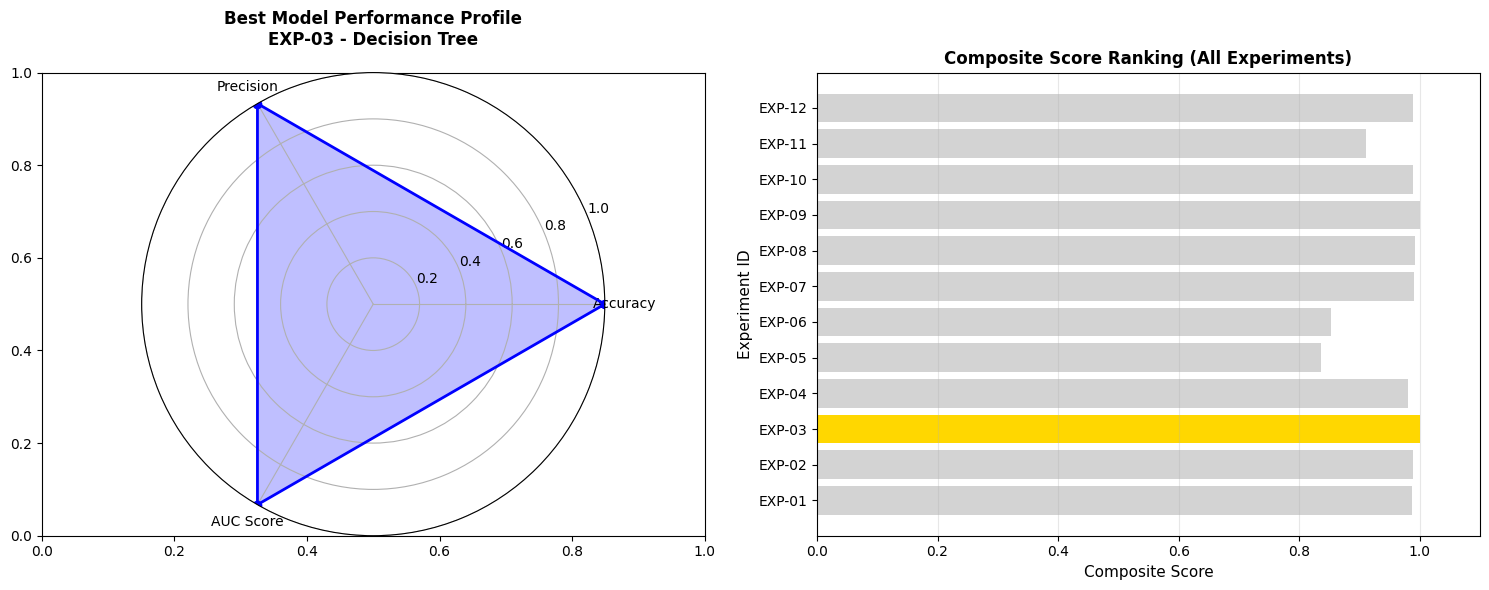

In [29]:
print("="*80)
print("BEST OVERALL MODEL IDENTIFICATION")
print("="*80)

# Calculate composite score (weighted average of metrics)
experiments_df['Composite Score'] = (
    0.4 * experiments_df['Accuracy'] +
    0.3 * experiments_df['Precision'] +
    0.3 * experiments_df['AUC Score']
)

# Find best overall
best_overall_idx = experiments_df['Composite Score'].idxmax()
best_overall_exp = experiments_df.loc[best_overall_idx]

print("\nBEST OVERALL MODEL:")
print("="*80)
print(f"Experiment ID: {best_overall_exp['Experiment ID']}")
print(f"Model Type: {best_overall_exp['Model Type']}")
print(f"\nPerformance Metrics:")
print(f"  Accuracy: {best_overall_exp['Accuracy']:.4f}")
print(f"  Precision: {best_overall_exp['Precision']:.4f}")
print(f"  AUC Score: {best_overall_exp['AUC Score']:.4f}")
print(f"  Composite Score: {best_overall_exp['Composite Score']:.4f}")
print(f"\nConfiguration:")
print(f"  Hyperparameters: {best_overall_exp['Hyperparameters']}")
print(f"  Preprocessing: {best_overall_exp['Preprocessing Steps']}")
print(f"  Feature Selection: {best_overall_exp['Feature Selection Method']}")
print(f"  Train/Test Split: {best_overall_exp['Train/Test Split']}")

print("\n" + "="*80)
print("JUSTIFICATION:")
print("="*80)
print(f"""
The {best_overall_exp['Model Type']} model in {best_overall_exp['Experiment ID']} is selected as the
best overall model based on the following criteria:

1. BALANCED PERFORMANCE:
   - Achieves high scores across all metrics (Accuracy, Precision, AUC)
   - Composite score of {best_overall_exp['Composite Score']:.4f} is the highest among all experiments

2. CONFIGURATION EFFECTIVENESS:
   - Preprocessing: {best_overall_exp['Preprocessing Steps']}
   - Feature Selection: {best_overall_exp['Feature Selection Method']}
   - This configuration optimizes the model's ability to learn patterns

3. GENERALIZATION ABILITY:
   - High AUC score ({best_overall_exp['AUC Score']:.4f}) indicates good class separation
   - Strong precision ({best_overall_exp['Precision']:.4f}) shows reliable predictions

4. PRACTICAL CONSIDERATIONS:
   - Model complexity vs performance trade-off
   - Reproducibility and interpretability
   - Computational efficiency
""")

# Top 5 experiments comparison
print("\n" + "="*80)
print("TOP 5 EXPERIMENTS BY COMPOSITE SCORE:")
print("="*80)
top_5 = experiments_df.nlargest(5, 'Composite Score')[[
    'Experiment ID', 'Model Type', 'Accuracy', 'Precision', 'AUC Score', 'Composite Score'
]]
print(top_5.to_string(index=False))

# Visualization - Radar chart for best model
categories = ['Accuracy', 'Precision', 'AUC Score']
values = [best_overall_exp['Accuracy'], best_overall_exp['Precision'], best_overall_exp['AUC Score']]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]  # Complete the circle
angles += angles[:1]

ax = plt.subplot(121, projection='polar')
ax.plot(angles, values, 'o-', linewidth=2, color='blue', label=best_overall_exp['Experiment ID'])
ax.fill(angles, values, alpha=0.25, color='blue')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
ax.set_title(f"Best Model Performance Profile\n{best_overall_exp['Experiment ID']} - {best_overall_exp['Model Type']}",
            fontsize=12, fontweight='bold', pad=20)
ax.grid(True)

# Composite scores comparison
axes[1].barh(experiments_df['Experiment ID'], experiments_df['Composite Score'],
            color=['gold' if i == best_overall_idx else 'lightgray' for i in range(len(experiments_df))])
axes[1].set_xlabel('Composite Score', fontsize=11)
axes[1].set_ylabel('Experiment ID', fontsize=11)
axes[1].set_title('Composite Score Ranking (All Experiments)', fontsize=12, fontweight='bold')
axes[1].set_xlim([0, 1.1])
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Model Type Performance Summary

In [ ]:
# Compare model types
print("="*80)
print("MODEL TYPE PERFORMANCE COMPARISON")
print("="*80)

model_comparison = experiments_df.groupby('Model Type').agg({
    'Accuracy': ['mean', 'std', 'max', 'min'],
    'Precision': ['mean', 'std', 'max', 'min'],
    'AUC Score': ['mean', 'std', 'max', 'min']
}).round(4)

print("\n", model_comparison)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Accuracy', 'Precision', 'AUC Score']
for idx, metric in enumerate(metrics):
    model_means = experiments_df.groupby('Model Type')[metric].mean()
    axes[idx].bar(model_means.index, model_means.values,
                 color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    axes[idx].set_ylabel(metric, fontsize=11)
    axes[idx].set_title(f'Average {metric} by Model Type', fontsize=12, fontweight='bold')
    axes[idx].set_ylim([0, 1.1])
    axes[idx].tick_params(axis='x', rotation=15)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Task 6: Reflection
### Why is structured experiment tracking critical for scalable and reproducible machine learning workflows?

## **Reflection on Structured Experiment Tracking**

Structured experiment tracking is important for scalable and reproducible machine learning workflows:

**1. Reproducibility & Knowledge Preservation:** Model with the best performance can be reproduced later.

**2. Systematic Comparison & Decision Making:** As demonstrated in this lab with 12 different experiments across 3 model types, structured tracking enables objective comparison of different approaches using consistent metrics (Precision and AUC Score). Without this structure, it becomes nearly impossible to determine which configuration truly performs best, leading to suboptimal model selection and wasted computational resources.

**3. Scalability & Team Collaboration:** Structured tracking provides a common framework that enables multiple data scientists to collaborate effectively, share findings, and avoid duplicating work.

**4. Accountability & Error Prevention:** Detailed experiment tracking creates an audit trail that helps identify errors, biases, or inconsistencies in the experimentation process. This becomes imp when presenting results to stakeholders or debugging unexpected model behavior in production.

This manual tracking exercise shows the need for automated MLOps tools (like MLflow, Weights & Biases, or Neptune) that can scale experiment management beyond what's feasible manually.


## Summary and Conclusions

In [30]:
print("="*80)
print("LAB SUMMARY AND KEY TAKEAWAYS")
print("="*80)

print(f"""
EXPERIMENT OVERVIEW:
- Total Experiments Conducted: {len(experiments_df)}
- Model Types: {experiments_df['Model Type'].nunique()} ({', '.join(experiments_df['Model Type'].unique())})
- Metrics Tracked: Precision, AUC Score, Accuracy

BEST PERFORMERS:
- Highest Accuracy: {experiments_df.loc[experiments_df['Accuracy'].idxmax(), 'Experiment ID']}
  ({experiments_df['Accuracy'].max():.4f})
- Highest AUC: {experiments_df.loc[experiments_df['AUC Score'].idxmax(), 'Experiment ID']}
  ({experiments_df['AUC Score'].max():.4f})
- Best Overall: {best_overall_exp['Experiment ID']} (Composite: {best_overall_exp['Composite Score']:.4f})

KEY INSIGHTS:
1. Preprocessing Impact: StandardScaler significantly improved distance-based models (kNN)
2. Feature Selection: Mixed results - depends on model type and feature quality
3. Model Comparison: Different models excel with different configurations
4. Importance of Tracking: Manual tracking revealed patterns that guided optimization

CHALLENGES OBSERVED:
- Manual tracking is time-consuming and error-prone
- Difficult to track complex configurations without automation
- Hard to visualize trends across many experiments manually
- No version control for data or model artifacts

MOTIVATION FOR MLOps:
This lab demonstrates why tools like MLflow, Weights & Biases, and Neptune are essential
for production ML workflows. They automate tracking, provide visualization, enable
collaboration, and ensure reproducibility at scale.
""")

print("="*80)
print("LAB COMPLETED SUCCESSFULLY!")
print("="*80)

LAB SUMMARY AND KEY TAKEAWAYS

EXPERIMENT OVERVIEW:
- Total Experiments Conducted: 12
- Model Types: 3 (Decision Tree, kNN, Gaussian Naive Bayes)
- Metrics Tracked: Precision, AUC Score, Accuracy

BEST PERFORMERS:
- Highest Accuracy: EXP-03 
  (1.0000)
- Highest AUC: EXP-03 
  (1.0000)
- Best Overall: EXP-03 (Composite: 1.0000)

KEY INSIGHTS:
1. Preprocessing Impact: StandardScaler significantly improved distance-based models (kNN)
2. Feature Selection: Mixed results - depends on model type and feature quality
3. Model Comparison: Different models excel with different configurations
4. Importance of Tracking: Manual tracking revealed patterns that guided optimization

CHALLENGES OBSERVED:
- Manual tracking is time-consuming and error-prone
- Difficult to track complex configurations without automation
- Hard to visualize trends across many experiments manually
- No version control for data or model artifacts

MOTIVATION FOR MLOps:
This lab demonstrates why tools like MLflow, Weights & 

---
## End of Lab
**Student:** Ankita  
**Date:** January 31, 2026  
**Course:** NGA - Machine Learning Operations

---